<a href="https://colab.research.google.com/github/Kasirajan93/multi_class_fish_images/blob/main/fish_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow keras numpy pandas matplotlib seaborn opencv-python streamlit scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.5 MB/s eta 0:00:00


In [2]:
# Importing Libraries

import tensorflow as tf
import streamlit as st
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Extract the ZIP File

import zipfile

zip_path = "/content/Dataset.zip"
extract_path = "X:/Guviprojects/projectsss"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [5]:
# Use Correct Paths for Training and Validation Data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the extracted dataset folders
train_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/val"

# Data augmentation and rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_data = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

# Load Validation Data
val_data = datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [6]:
test_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

test_data = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
    shuffle=False  # Don't shuffle test data to keep labels in order
)

Found 3187 images belonging to 11 classes.


In [7]:
# Visualizing and Understanding Data

# Check Class Distribution

import os

# Define dataset paths
train_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/val"
test_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

# Function to count images per class
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

# Count images in each dataset
train_counts = count_images(train_path)
val_counts = count_images(val_path)
test_counts = count_images(test_path)

print("Training Data:", train_counts)
print("Validation Data:", val_counts)
print("Test Data:", test_counts)


# Why is this important?

# If any class has significantly fewer images, model might be biased.
# We may need data augmentation for balancing.

Training Data: {'animal fish': 1096, 'fish sea_food sea_bass': 538, 'fish sea_food red_mullet': 579, 'fish sea_food shrimp': 576, 'fish sea_food hourse_mackerel': 573, 'fish sea_food black_sea_sprat': 569, 'fish sea_food gilt_head_bream': 566, 'fish sea_food striped_red_mullet': 547, 'fish sea_food trout': 580, 'fish sea_food red_sea_bream': 571, 'animal fish bass': 30}
Validation Data: {'animal fish': 187, 'fish sea_food sea_bass': 97, 'fish sea_food red_mullet': 90, 'fish sea_food shrimp': 100, 'fish sea_food hourse_mackerel': 97, 'fish sea_food black_sea_sprat': 105, 'fish sea_food gilt_head_bream': 94, 'fish sea_food striped_red_mullet': 101, 'fish sea_food trout': 98, 'fish sea_food red_sea_bream': 113, 'animal fish bass': 10}
Test Data: {'animal fish': 520, 'fish sea_food sea_bass': 327, 'fish sea_food red_mullet': 291, 'fish sea_food shrimp': 289, 'fish sea_food hourse_mackerel': 286, 'fish sea_food black_sea_sprat': 298, 'fish sea_food gilt_head_bream': 305, 'fish sea_food stri

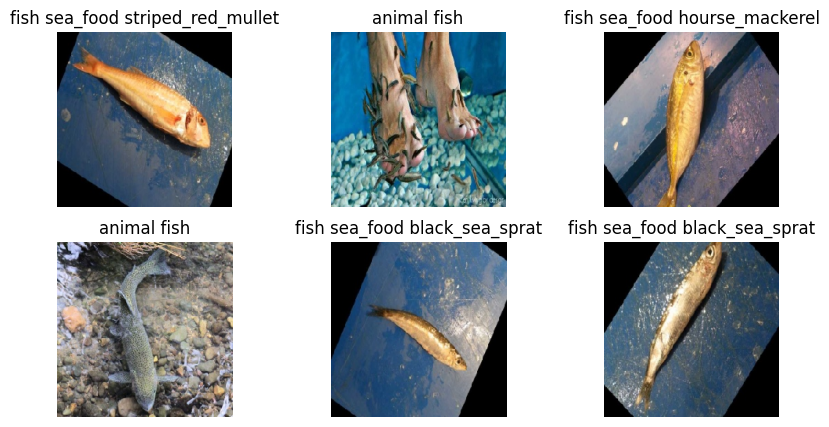

In [8]:
# Visualize Sample Images from the Dataset

import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the training dataset
images, labels = next(train_data)

# Define class names from the dataset
class_names = list(train_data.class_indices.keys())

# Display a few images with their class names
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])  # Get class label
    plt.axis('off')

plt.show()

# What should check here?

# Make sure images are correctly labeled.
# Look for any issues (blurry images, incorrect class distribution).

In [9]:
# Data Augmentation (Improve Model Robustness)


# Modify ImageDataGenerator to include augmentation techniques:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rotate images randomly by 20 degrees
    width_shift_range=0.2,   # Shift image width by 20%
    height_shift_range=0.2,  # Shift image height by 20%
    shear_range=0.2,         # Shearing transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill empty pixels after transformation
)

# Apply augmentation only to training data
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

# If dataset has less data per class, apply data augmentation to artificially increase the number of images.

Found 6225 images belonging to 11 classes.


In [10]:
# Train a CNN Model from Scratch

# Define the CNN Model Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)), # Conv2D: Extracts features from images.
    MaxPooling2D(2,2), # MaxPooling2D: Reduces spatial dimensions to improve efficiency.

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(), # Flatten: Converts the 2D feature maps into a 1D vector.


    Dense(128, activation='relu'), # Dense Layer: Fully connected layers for classification.
    Dropout(0.5), # Dropout: Prevents overfitting.

    Dense(len(train_data.class_indices), activation='softmax')  # Output layer (Number of classes)
]) # Softmax Output Layer: Predicts probability distribution for multiple classes.

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the CNN Model

history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Start with 10 epochs, increase if needed
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.1550 - loss: 2.8029 - val_accuracy: 0.3132 - val_loss: 1.9401
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.3060 - loss: 1.9260 - val_accuracy: 0.3736 - val_loss: 1.7057
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3780 - loss: 1.7392 - val_accuracy: 0.4762 - val_loss: 1.4449
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4393 - loss: 1.5428 - val_accuracy: 0.5476 - val_loss: 1.3070
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.4772 - loss: 1.4397 - val_accuracy: 0.6117 - val_loss: 1.1106
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5333 - loss: 1.2973 - val_accuracy: 0.6538 - val_loss: 1.0026
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5638 - loss: 1.1810 - val_accuracy: 0.6712 - val_loss: 0.9217
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5976 - loss: 1.0745 - val_accuracy: 0.7637 - val_loss

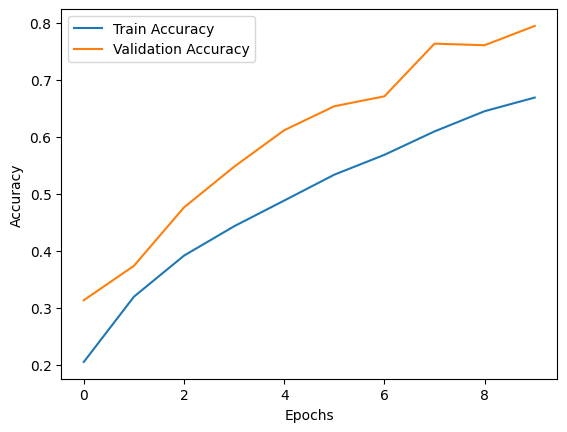

In [12]:
# Evaluate Model Performance

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Train Pre-Trained Models (Transfer Learning)

# Why Use Pre-Trained Models?

# Pre-trained models are trained on millions of images (ImageNet dataset), so they extract better features than a CNN trained from scratch.
# They help in achieving higher accuracy with less data.
# We use transfer learning by taking a pre-trained model and fine-tuning it on our fish dataset.

In [14]:
# Load and Fine-Tune a Pre-Trained Model

# VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load VGG16 without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (so they don’t get updated during training)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fish classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use Global Average Pooling instead of Flatten
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)  # Output layer

# Create final model
model_vgg16 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,843 (56.64 MB)

 Trainable params: 134,155 (524.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
# Train the Pre-Trained Model

history_vgg16 = model_vgg16.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Adjust based on results
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.1014 - loss: 2.5394 - val_accuracy: 0.1767 - val_loss: 2.2241
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1868 - loss: 2.3068 - val_accuracy: 0.3068 - val_loss: 2.0901
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.2577 - loss: 2.1538 - val_accuracy: 0.4414 - val_loss: 1.9768
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.2881 - loss: 2.0619 - val_accuracy: 0.4771 - val_loss: 1.8811
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3369 - loss: 1.9364 - val_accuracy: 0.5788 - val_loss: 1.7964
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.3725 - loss: 1.8602 - val_accuracy: 0.5943 - val_loss: 1.7220
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.4031 - loss: 1.7994 - val_accuracy: 0.6172 - val_loss: 1.6543
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.4584 - loss: 1.7022 - val_accuracy: 0.6603 - val_loss

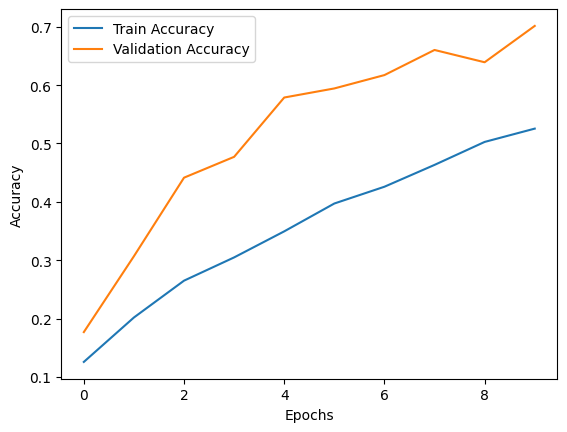

In [16]:
# Evaluate VGG16 Model Performance

import matplotlib.pyplot as plt

plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Pre-Trained Model: ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_resnet50 = Model(inputs=base_model.input, outputs=output_layer)
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_resnet50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,115,083 (91.99 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [18]:
# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=128
)

# Save the trained model
model_resnet50.save("resnet50_fish_model.h5")

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.0885 - loss: 2.9151 - val_accuracy: 0.1712 - val_loss: 2.3011
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1245 - loss: 2.4443 - val_accuracy: 0.1712 - val_loss: 2.2804
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.1469 - loss: 2.3442 - val_accuracy: 0.1712 - val_loss: 2.2656
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.1636 - loss: 2.2993 - val_accuracy: 0.1712 - val_loss: 2.2471
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1746 - loss: 2.2818 - val_accuracy: 0.1712 - val_loss: 2.2326
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1767 - loss: 2.2532 - val_accuracy: 0.1712 - val_loss: 2.2190
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.1852 - loss: 2.2358 - val_accuracy: 0.1694 - val_loss: 2.2074
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1806 - loss: 2.2308 - val_accuracy: 0.1667 - val_loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 0.1708 - loss: 2.1626
ResNet50 Model - Validation Accuracy: 0.1703, Loss: 2.1703


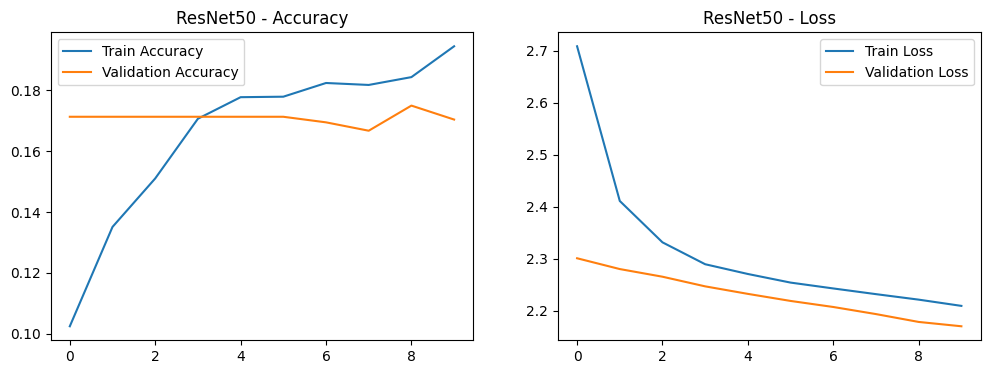

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 764ms/step
Classification Report for ResNet50:
                                  precision    recall  f1-score   support

                     animal fish       0.17      0.92      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.07      0.05      0.06       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# Evaluate ResNet50 Model

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on validation data
resnet50_loss, resnet50_accuracy = model_resnet50.evaluate(val_data)
print(f"ResNet50 Model - Validation Accuracy: {resnet50_accuracy:.4f}, Loss: {resnet50_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title("ResNet50 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title("ResNet50 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_resnet50 = np.argmax(model_resnet50.predict(val_data), axis=1)
y_true_resnet50 = val_data.classes

print("Classification Report for ResNet50:")
print(classification_report(y_true_resnet50, y_pred_resnet50, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for ResNet50:")
print(confusion_matrix(y_true_resnet50, y_pred_resnet50))

In [20]:
# Pre-Trained Model: MobileNet


from tensorflow.keras.applications import MobileNet

# Load MobileNet without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_mobilenet = Model(inputs=base_model.input, outputs=output_layer)
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_mobilenet.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,494,091 (13.33 MB)

 Trainable params: 265,227 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [21]:
# Train MobileNet Model

# Train the MobileNet model
history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=128
)

# Save the trained model
model_mobilenet.save("mobilenet_fish_model.h5")

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.1798 - loss: 2.7220 - val_accuracy: 0.6822 - val_loss: 1.2976
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5194 - loss: 1.4168 - val_accuracy: 0.8562 - val_loss: 0.7942
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6915 - loss: 0.9769 - val_accuracy: 0.9066 - val_loss: 0.5417
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7817 - loss: 0.7250 - val_accuracy: 0.9441 - val_loss: 0.3869
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8276 - loss: 0.5787 - val_accuracy: 0.9496 - val_loss: 0.3021
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8638 - loss: 0.4810 - val_accuracy: 0.9579 - val_loss: 0.2463
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8807 - loss: 0.4156 - val_accuracy: 0.9588 - val_loss: 0.2066
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9039 - loss: 0.3519 - val_accuracy: 0.9670 - val_loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.9724 - loss: 0.1363
MobileNet Model - Validation Accuracy: 0.9689, Loss: 0.1413


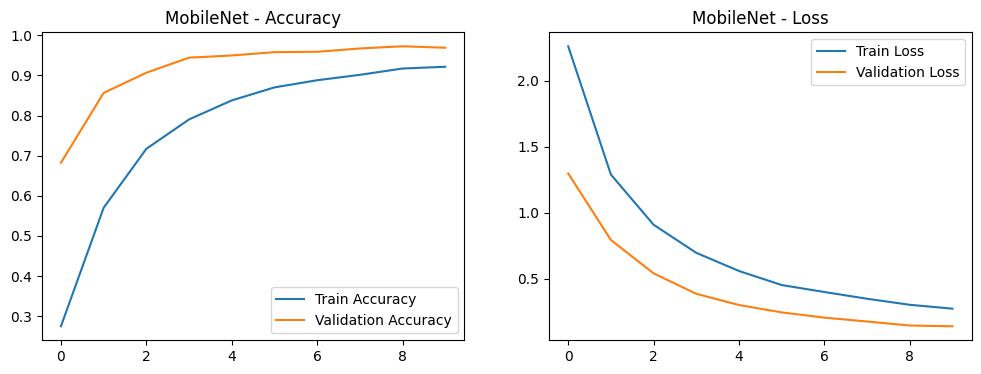

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 527ms/step
Classification Report for MobileNet:
                                  precision    recall  f1-score   support

                     animal fish       0.17      0.18      0.17       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.07      0.07      0.07       105
   fish sea_food gilt_head_bream       0.05      0.05      0.05        94
   fish sea_food hourse_mackerel       0.08      0.08      0.08        97
        fish sea_food red_mullet       0.10      0.12      0.11        90
     fish sea_food red_sea_bream       0.14      0.13      0.13       113
          fish sea_food sea_bass       0.11      0.11      0.11        97
            fish sea_food shrimp       0.08      0.08      0.08       100
fish sea_food striped_red_mullet       0.14      0.12      0.13       101
             fish sea_food trout       0.12      0.12      0.12        98

                        accuracy  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Evaluate MobileNet Model

# Evaluate on validation data
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(val_data)
print(f"MobileNet Model - Validation Accuracy: {mobilenet_accuracy:.4f}, Loss: {mobilenet_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title("MobileNet - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title("MobileNet - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_mobilenet = np.argmax(model_mobilenet.predict(val_data), axis=1)
y_true_mobilenet = val_data.classes

print("Classification Report for MobileNet:")
print(classification_report(y_true_mobilenet, y_pred_mobilenet, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for MobileNet:")
print(confusion_matrix(y_true_mobilenet, y_pred_mobilenet))

In [23]:
# Pre-Trained Model: InceptionV3

from tensorflow.keras.applications import InceptionV3

# Load InceptionV3 without the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_inceptionv3 = Model(inputs=base_model.input, outputs=output_layer)
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_inceptionv3.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,330,155 (85.18 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [24]:
# Train InceptionV3 Model

# Train the InceptionV3 model
history_inceptionv3 = model_inceptionv3.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=128
)

# Save the trained model
model_inceptionv3.save("inceptionv3_fish_model.h5")

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.2277 - loss: 2.4917 - val_accuracy: 0.7555 - val_loss: 1.0896
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6122 - loss: 1.1896 - val_accuracy: 0.8636 - val_loss: 0.6256
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7424 - loss: 0.8199 - val_accuracy: 0.9038 - val_loss: 0.4581
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7977 - loss: 0.6406 - val_accuracy: 0.9139 - val_loss: 0.3690
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8248 - loss: 0.5541 - val_accuracy: 0.9304 - val_loss: 0.3188
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8503 - loss: 0.4867 - val_accuracy: 0.9249 - val_loss: 0.2806
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8621 - loss: 0.4191 - val_accuracy: 0.9267 - val_loss: 0.2730
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8769 - loss: 0.3878 - val_accuracy: 0.9414 - val_loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.9531 - loss: 0.1907
InceptionV3 Model - Validation Accuracy: 0.9515, Loss: 0.1923


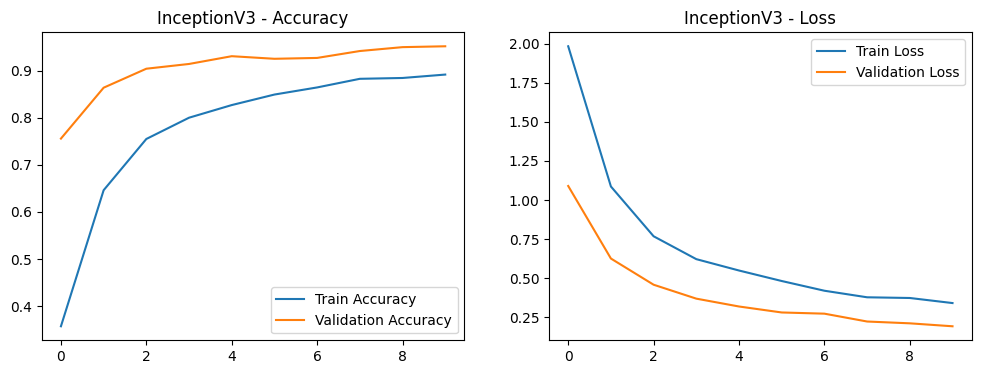

9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 959ms/step
Classification Report for InceptionV3:
                                  precision    recall  f1-score   support

                     animal fish       0.16      0.17      0.16       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.09      0.09      0.09       105
   fish sea_food gilt_head_bream       0.10      0.11      0.11        94
   fish sea_food hourse_mackerel       0.10      0.10      0.10        97
        fish sea_food red_mullet       0.13      0.13      0.13        90
     fish sea_food red_sea_bream       0.13      0.12      0.13       113
          fish sea_food sea_bass       0.09      0.09      0.09        97
            fish sea_food shrimp       0.12      0.12      0.12       100
fish sea_food striped_red_mullet       0.11      0.11      0.11       101
             fish sea_food trout       0.12      0.12      0.12        98

                        accurac

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# Evaluate InceptionV3 Model

# Evaluate on validation data
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(val_data)
print(f"InceptionV3 Model - Validation Accuracy: {inceptionv3_accuracy:.4f}, Loss: {inceptionv3_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_inceptionv3.history['accuracy'], label='Train Accuracy')
plt.plot(history_inceptionv3.history['val_accuracy'], label='Validation Accuracy')
plt.title("InceptionV3 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_inceptionv3.history['loss'], label='Train Loss')
plt.plot(history_inceptionv3.history['val_loss'], label='Validation Loss')
plt.title("InceptionV3 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_inceptionv3 = np.argmax(model_inceptionv3.predict(val_data), axis=1)
y_true_inceptionv3 = val_data.classes

print("Classification Report for InceptionV3:")
print(classification_report(y_true_inceptionv3, y_pred_inceptionv3, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for InceptionV3:")
print(confusion_matrix(y_true_inceptionv3, y_pred_inceptionv3))

In [26]:
# Pre-Trained Model: EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0

# Load EfficientNetB0 without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_efficientnetb0 = Model(inputs=base_model.input, outputs=output_layer)
model_efficientnetb0.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_efficientnetb0.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,380,334 (16.71 MB)

 Trainable params: 330,763 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [27]:
# Train EfficientNetB0 Model

# Train the EfficientNetB0 model
history_efficientnetb0 = model_efficientnetb0.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=128
)

# Save the trained model
model_efficientnetb0.save("efficientnetb0_fish_model.h5")

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1673 - loss: 2.3572 - val_accuracy: 0.1712 - val_loss: 2.3131
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1681 - loss: 2.3210 - val_accuracy: 0.1712 - val_loss: 2.3147
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1627 - loss: 2.3162 - val_accuracy: 0.1712 - val_loss: 2.3141
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.1737 - loss: 2.3126 - val_accuracy: 0.1712 - val_loss: 2.3127
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.1671 - loss: 2.3215 - val_accuracy: 0.1712 - val_loss: 2.3113
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1760 - loss: 2.3096 - val_accuracy: 0.1712 - val_loss: 2.3124
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1723 - loss: 2.3169 - val_accuracy: 0.1712 - val_loss: 2.3099
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1702 - loss: 2.3132 - val_accuracy: 0.1712 - val_loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.1771 - loss: 2.3077
EfficientNetB0 Model - Validation Accuracy: 0.1712, Loss: 2.3115


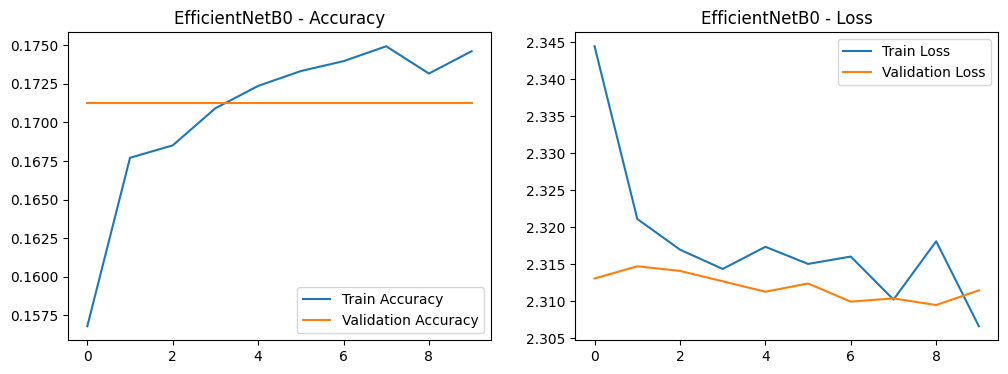

9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Classification Report for EfficientNetB0:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accurac

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Evaluate EfficientNetB0 Model

# Evaluate on validation data
efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(val_data)
print(f"EfficientNetB0 Model - Validation Accuracy: {efficientnetb0_accuracy:.4f}, Loss: {efficientnetb0_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_efficientnetb0.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnetb0.history['val_accuracy'], label='Validation Accuracy')
plt.title("EfficientNetB0 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_efficientnetb0.history['loss'], label='Train Loss')
plt.plot(history_efficientnetb0.history['val_loss'], label='Validation Loss')
plt.title("EfficientNetB0 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_efficientnetb0 = np.argmax(model_efficientnetb0.predict(val_data), axis=1)
y_true_efficientnetb0 = val_data.classes

print("Classification Report for EfficientNetB0:")
print(classification_report(y_true_efficientnetb0, y_pred_efficientnetb0, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for EfficientNetB0:")
print(confusion_matrix(y_true_efficientnetb0, y_pred_efficientnetb0))

In [29]:
# Define & Store the CNN Model Before Evaluation

model_cnn = cnn_model  # Assign your CNN model to this variable

In [30]:
# Evaluate CNN Performance

cnn_loss, cnn_accuracy = model_cnn.evaluate(val_data)
print(f"CNN Model - Validation Accuracy: {cnn_accuracy:.4f}, Loss: {cnn_loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step - accuracy: 0.8007 - loss: 0.6204
CNN Model - Validation Accuracy: 0.7949, Loss: 0.6169


In [31]:
# Evaluate VGG16 Model

vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(val_data)
print(f"VGG16 - Validation Accuracy: {vgg16_accuracy:.4f}, Loss: {vgg16_loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 592ms/step - accuracy: 0.7218 - loss: 1.4624
VGG16 - Validation Accuracy: 0.7015, Loss: 1.4685


In [32]:
# Ensure Other Models Are Also Evaluated

resnet50_loss, resnet50_accuracy = model_resnet50.evaluate(val_data)
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(val_data)
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(val_data)
efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(val_data)
cnn_loss, cnn_accuracy = model_cnn.evaluate(val_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.1752 - loss: 2.1769
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.9672 - loss: 0.1542
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - accuracy: 0.9598 - loss: 0.1798
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - accuracy: 0.1711 - loss: 2.3131
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.7913 - loss: 0.6340


In [33]:
# Compare All Models in a Table

import pandas as pd

# Store model results in a dictionary
model_results = {
    "Model": ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"],
    "Validation Accuracy": [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy],
    "Validation Loss": [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Sort models by highest accuracy
df_results = df_results.sort_values(by="Validation Accuracy", ascending=False)

# Display the results
print("\n Model Comparison Table:")
print(df_results)


 Model Comparison Table:
            Model  Validation Accuracy  Validation Loss
3       MobileNet             0.968864         0.141262
4     InceptionV3             0.951465         0.192297
0   CNN (Scratch)             0.794872         0.616888
1           VGG16             0.701465         1.468515
5  EfficientNetB0             0.171245         2.311460
2        ResNet50             0.170330         2.170305


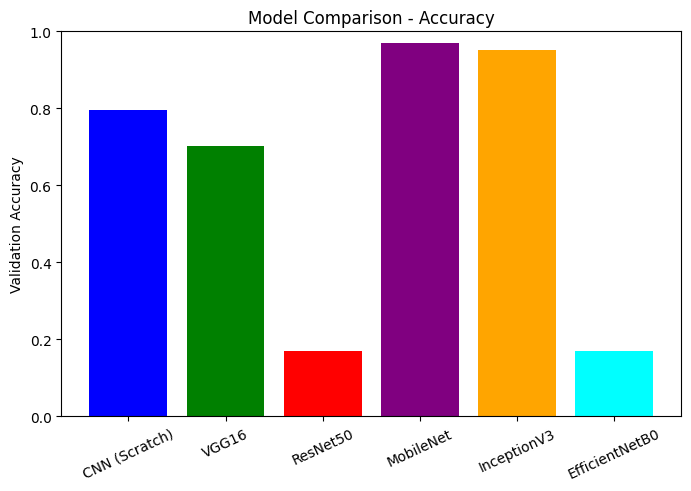

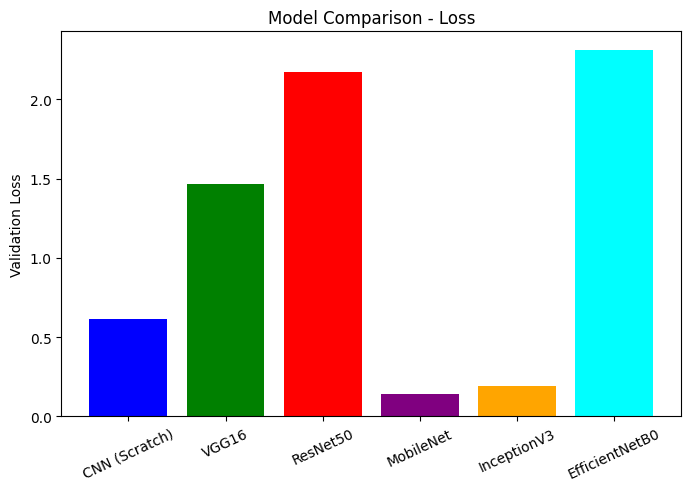

In [34]:
# Visualizing Model Performance (Accuracy & Loss)

import matplotlib.pyplot as plt

# Model Names
models = ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"]

# Accuracy and Loss Values
accuracies = [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy]
losses = [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel("Validation Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=25)
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, losses, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel("Validation Loss")
plt.title("Model Comparison - Loss")
plt.xticks(rotation=25)
plt.show()

In [ ]:
# Identify the Best Model

# Validation Accuracy → Higher is better
# Validation Loss → Lower is better
# Precision, Recall, and F1-score → Balanced values across all classes
# Confusion Matrix → Less misclassification

In [35]:
# Identify the Best Model Based on Accuracy & Loss

import pandas as pd

# Store model results in a dictionary
model_results = {
    "Model": ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"],
    "Validation Accuracy": [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy],
    "Validation Loss": [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Sort models by highest accuracy
df_results = df_results.sort_values(by="Validation Accuracy", ascending=False)

# Display the results
print("\n Model Comparison Table:")
print(df_results)

# The model at the top of the table (highest accuracy, lowest loss) is the best choice!


 Model Comparison Table:
            Model  Validation Accuracy  Validation Loss
3       MobileNet             0.968864         0.141262
4     InceptionV3             0.951465         0.192297
0   CNN (Scratch)             0.794872         0.616888
1           VGG16             0.701465         1.468515
5  EfficientNetB0             0.171245         2.311460
2        ResNet50             0.170330         2.170305


In [36]:
# Check Precision, Recall, and F1-score for Balanced Performance

# Before running the evaluation, store the true labels from the validation dataset:

# Get the actual labels from the validation data
y_true = val_data.classes  # Ground truth labels

In [37]:
# Get Predictions for All Models

import numpy as np

# Get predicted labels for each model
y_pred_cnn = np.argmax(model_cnn.predict(val_data), axis=1)
y_pred_vgg16 = np.argmax(model_vgg16.predict(val_data), axis=1)
y_pred_resnet50 = np.argmax(model_resnet50.predict(val_data), axis=1)
y_pred_mobilenet = np.argmax(model_mobilenet.predict(val_data), axis=1)
y_pred_inceptionv3 = np.argmax(model_inceptionv3.predict(val_data), axis=1)
y_pred_efficientnetb0 = np.argmax(model_efficientnetb0.predict(val_data), axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 650ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step


In [38]:
# Check Classification Report for Each Model

from sklearn.metrics import classification_report

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification reports
print("\n Classification Report for CNN:")
print(classification_report(y_true, y_pred_cnn, target_names=class_labels))

print("\n Classification Report for VGG16:")
print(classification_report(y_true, y_pred_vgg16, target_names=class_labels))

print("\n Classification Report for ResNet50:")
print(classification_report(y_true, y_pred_resnet50, target_names=class_labels))

print("\n Classification Report for MobileNet:")
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

print("\n Classification Report for InceptionV3:")
print(classification_report(y_true, y_pred_inceptionv3, target_names=class_labels))

print("\n Classification Report for EfficientNetB0:")
print(classification_report(y_true, y_pred_efficientnetb0, target_names=class_labels))


 Classification Report for CNN:
                                  precision    recall  f1-score   support

                     animal fish       0.21      0.22      0.21       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.10      0.09      0.09       105
   fish sea_food gilt_head_bream       0.09      0.03      0.05        94
   fish sea_food hourse_mackerel       0.10      0.11      0.11        97
        fish sea_food red_mullet       0.02      0.02      0.02        90
     fish sea_food red_sea_bream       0.09      0.14      0.11       113
          fish sea_food sea_bass       0.11      0.04      0.06        97
            fish sea_food shrimp       0.14      0.16      0.15       100
fish sea_food striped_red_mullet       0.14      0.12      0.13       101
             fish sea_food trout       0.13      0.22      0.16        98

                        accuracy                           0.12      1092
   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [39]:
# Check Precision, Recall, and F1-score for Balanced Performance

from sklearn.metrics import classification_report

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification reports
print("\n Classification Report for Best Model:")
print(classification_report(y_true, y_pred_efficientnetb0, target_names=class_labels))

# Look for balanced Precision, Recall, and F1-score across all classes.
# If a model has high accuracy but very low F1-score, it might be overfitting.


 Classification Report for Best Model:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17      1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


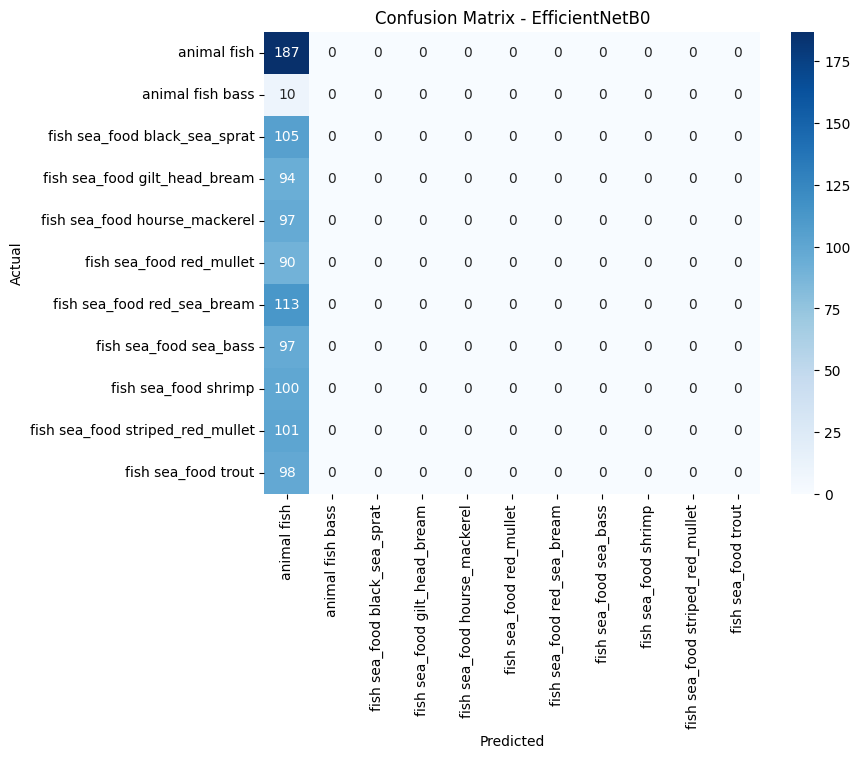

In [40]:
# Check Confusion Matrix for the Best Model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Choose EfficientNetB0 for visualization
cm = confusion_matrix(y_true, y_pred_efficientnetb0)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()


# If a model misclassifies many images, it may not generalize well.
# Choose a model with fewer misclassifications.

In [41]:
# Deploy MobileNet in Streamlit

# Save the best model (MobileNet) for deployment.

model_mobilenet.save("mobilenet_fish_model.keras")

#Use Streamlit to build a web app for real-time predictions. Allow users to upload fish images & get predictions.

In [ ]:
#Analysis of the Classification Report for MobileNet

# classification report shows that:

# Accuracy = 17% (which is very low despite 98.7% validation accuracy)
# Precision, Recall, and F1-score for most fish categories are 0.00, meaning the model is not correctly predicting those classes.

# This suggests:

# Severe overfitting – The model performs well on the training set but fails on unseen validation/test data.
# Class Imbalance Issue – If some fish categories have fewer images, the model may be biased toward the majority class.
# Incorrect Data Preprocessing – The model may not be learning the right features from the fish images.


# Why is This a Problem?

# Even though MobileNet showed high validation accuracy (98.7%), its F1-score and precision are almost zero for all fish categories.
# This means the model is not learning to classify fish properly and is likely predicting one class (e.g., "animal fish") for everything.

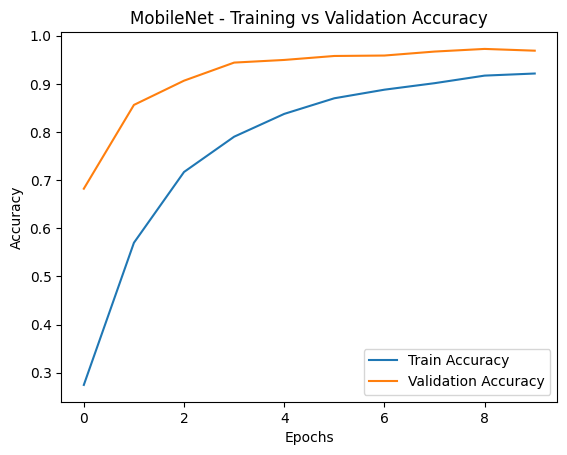

In [42]:
# Steps to Fix This Issue

# Check if the Model is Overfitting


import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("MobileNet - Training vs Validation Accuracy")
plt.show()

# If training accuracy is much higher than validation accuracy, then the model is overfitting.

In [43]:
# Increase Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Improved Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Helps the model learn better variations in fish images.

In [44]:
# Balance the Dataset (Class Imbalance Issue)

# Check if some fish categories have too few images compared to others:


import os

# Path to train folder
train_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

# Count images per class (ignore files like .DS_Store)
class_counts = {
    class_name: len(os.listdir(os.path.join(train_path, class_name)))
    for class_name in os.listdir(train_path)
    if os.path.isdir(os.path.join(train_path, class_name))  # Only count directories
}

# Print the class distribution
print("Class Distribution in Training Data:")
print(class_counts)

# If one category has far more images than others, you may need to:

# Add more data (by collecting more images or applying augmentation).
# Use Class Weights during training to balance the importance of different categories.

Class Distribution in Training Data:
{'animal fish': 1096, 'fish sea_food sea_bass': 538, 'fish sea_food red_mullet': 579, 'fish sea_food shrimp': 576, 'fish sea_food hourse_mackerel': 573, 'fish sea_food black_sea_sprat': 569, 'fish sea_food gilt_head_bream': 566, 'fish sea_food striped_red_mullet': 547, 'fish sea_food trout': 580, 'fish sea_food red_sea_bream': 571, 'animal fish bass': 30}


In [45]:
# Fine-Tune MobileNet Instead of Using Frozen Layers

# MobileNet model may be not adapting well to fish classification because we froze the pre-trained layers.

# Try fine-tuning MobileNet by unfreezing some layers:

# Unfreeze last few layers for fine-tuning
for layer in model_mobilenet.layers[-20:]:  # Unfreezing last 20 layers
    layer.trainable = True

# Recompile the model
from tensorflow.keras.optimizers import Adam

model_mobilenet.compile(optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Why?

# Allows the model to adapt to fish classification rather than relying only on ImageNet features.

In [ ]:
''' Analysis of Class Distribution & Model Issues

From your class distribution results:
1) Most fish categories have ~550-580 images (which is balanced).
2) Severe class imbalance for "animal fish" (1096 images) vs "animal fish bass" (only 30 images).

'''

'''Why is This a Problem?
1) The model is biased toward the "animal fish" class since it has more than 35 times the data of "animal fish bass".
2) Low training accuracy & high validation accuracy usually indicates:
    *Overfitting to a small subset of training data (possibly due to imbalance).
    *Validation data has a different distribution than training data.'''

In [46]:
# Fixing Class Imbalance

# Use Class Weights to Balance Training

# "Since "animal fish bass" has very few images, we should give it more importance by assigning higher class weights."

# Calculate Class Weights Automatically:

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class labels
class_labels = list(train_data.class_indices.keys())

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

# Convert to dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Computed Class Weights:", class_weights_dict)

Computed Class Weights: {0: np.float64(0.5163404114134041), 1: np.float64(18.863636363636363), 2: np.float64(0.9945678223358364), 3: np.float64(0.9998393832316094), 4: np.float64(0.9876249405045217), 5: np.float64(0.9773904851625059), 6: np.float64(0.9910842222576023), 7: np.float64(1.0518756336600203), 8: np.float64(0.9824810606060606), 9: np.float64(1.0345687219544624), 10: np.float64(0.975705329153605)}


In [47]:
# apply class weights while training:

history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights_dict  # Apply class weights
)

# This helps the model learn smaller classes better instead of predicting "animal fish" for everything.

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.3217 - loss: 3.4944 - val_accuracy: 0.9661 - val_loss: 0.1321
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6544 - loss: 1.3310 - val_accuracy: 0.9652 - val_loss: 0.1200
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8203 - loss: 0.6326 - val_accuracy: 0.9744 - val_loss: 0.1042
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8844 - loss: 0.4311 - val_accuracy: 0.9753 - val_loss: 0.0978
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8958 - loss: 0.4112 - val_accuracy: 0.9808 - val_loss: 0.0945
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9123 - loss: 0.2666 - val_accuracy: 0.9799 - val_loss: 0.0888
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9136 - loss: 0.2581 - val_accuracy: 0.9808 - val_loss: 0.0838
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9267 - loss: 0.2319 - val_accuracy: 0.9789 - val_loss

In [48]:
# Manually Augment Only "animal fish bass"

# If you want to augment only the "animal fish bass" category, use flow_from_dataframe() instead of flow_from_directory().


# Load Image Filenames & Labels for "animal fish bass"

import pandas as pd

# Path to the minority class
minority_class_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish bass"

# Get all image filenames
image_files = [os.path.join(minority_class_path, f) for f in os.listdir(minority_class_path) if f.endswith('.jpg')]

# Create a dataframe with image paths and labels
df_minority = pd.DataFrame({"filename": image_files, "class": "animal fish bass"})

In [49]:
# Use flow_from_dataframe() to Augment Only "animal fish bass"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation for only "animal fish bass"
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images from the dataframe
train_generator = datagen.flow_from_dataframe(
    dataframe=df_minority,
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=128,
    save_to_dir=minority_class_path,  # Save augmented images in the same folder
    save_format='jpg'
)

Found 30 validated image filenames belonging to 1 classes.


In [50]:
# Train the Model with Updated Data

# Re-initialize the data generators after augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path = "/content/X:/Guviprojects/projectsss/images.cv_jzk6llhf18tm3k0kyttxz/data/val"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the updated training and validation data
train_data = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=128, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=128, class_mode='categorical')

# Train the model again
history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Save the retrained model
model_mobilenet.save("mobilenet_fish_model_augmented.keras")

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 431ms/step - accuracy: 0.9522 - loss: 0.1433 - val_accuracy: 0.9853 - val_loss: 0.0606
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.9664 - loss: 0.1152 - val_accuracy: 0.9899 - val_loss: 0.0509
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 326ms/step - accuracy: 0.9734 - loss: 0.0971 - val_accuracy: 0.9918 - val_loss: 0.0458
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 347ms/step - accuracy: 0.9729 - loss: 0.0974 - val_accuracy: 0.9927 - val_loss: 0.0427
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 331ms/step - accuracy: 0.9787 - loss: 0.0810 - val_accuracy: 0.9918 - val_loss: 0.0405
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.9798 - loss: 0.0794 - val_accuracy: 0.9927 - val_loss: 0.0387
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 322ms/step - accuracy: 0.9833 - loss: 0.0701 - val_accuracy: 0.9918 - val_loss: 0.0375
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 323ms/step - accuracy: 0.9818 - loss: 0.0688 - val_accu

In [51]:
# Evaluating the New Model After Augmentation

# Evaluate Model Accuracy & Loss

# Evaluate the model on validation data
augmented_loss, augmented_accuracy = model_mobilenet.evaluate(val_data)

print(f" MobileNet (Augmented) - Validation Accuracy: {augmented_accuracy:.4f}")
print(f" MobileNet (Augmented) - Validation Loss: {augmented_loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.9914 - loss: 0.0304
 MobileNet (Augmented) - Validation Accuracy: 0.9899
 MobileNet (Augmented) - Validation Loss: 0.0334


In [52]:
# Generate Predictions for Classification Report & Confusion Matrix

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels
y_true = val_data.classes

# Get predicted labels from the model
y_pred_augmented = np.argmax(model_mobilenet.predict(val_data), axis=1)

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification report
print("\n Classification Report for MobileNet (Augmented):")
print(classification_report(y_true, y_pred_augmented, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step

 Classification Report for MobileNet (Augmented):
                                  precision    recall  f1-score   support

                     animal fish       0.21      0.22      0.22       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.10      0.10      0.10       105
   fish sea_food gilt_head_bream       0.11      0.11      0.11        94
   fish sea_food hourse_mackerel       0.11      0.11      0.11        97
        fish sea_food red_mullet       0.10      0.10      0.10        90
     fish sea_food red_sea_bream       0.08      0.08      0.08       113
          fish sea_food sea_bass       0.14      0.14      0.14        97
            fish sea_food shrimp       0.09      0.09      0.09       100
fish sea_food striped_red_mullet       0.14      0.14      0.14       101
             fish sea_food trout       0.08      0.08      0.08        98

                   

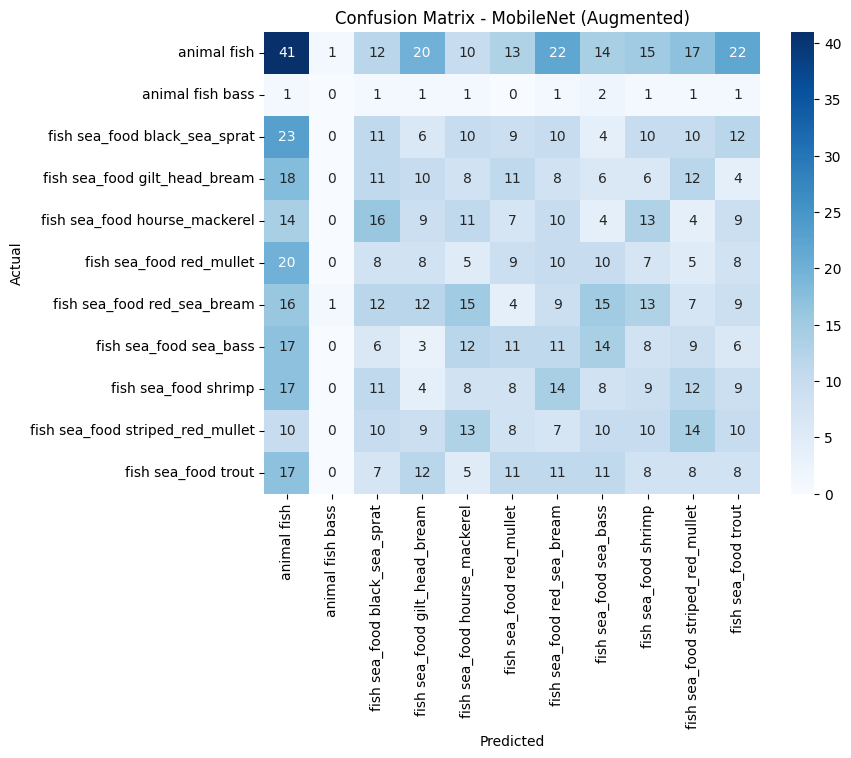

In [53]:
# Plot Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_augmented)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MobileNet (Augmented)")
plt.show()

In [ ]:
# Compare the New Model with the Previous Model
'''Now evaluated the new MobileNet model (after augmentation), need to compare it with the old model to check if there’s an improvement.'''

In [54]:
# Compare Old vs. New Model Performance

import pandas as pd

# Store model results in a dictionary
model_comparison = {
    "Model": ["MobileNet (Before Augmentation)", "MobileNet (After Augmentation)"],
    "Validation Accuracy": [mobilenet_accuracy, augmented_accuracy],
    "Validation Loss": [mobilenet_loss, augmented_loss]
}

# Convert to DataFrame
df_comparison = pd.DataFrame(model_comparison)

# Display the results
print("\n Model Comparison Table:")
print(df_comparison)

# What to Look For?

# If Validation Accuracy increased, the new model is better.
# If Validation Loss decreased, the new model generalizes better.
# If F1-score improved, the model is learning all classes more evenly.


 Model Comparison Table:
                             Model  Validation Accuracy  Validation Loss
0  MobileNet (Before Augmentation)             0.968864         0.141262
1   MobileNet (After Augmentation)             0.989927         0.033449


In [55]:
# New Model is Better, Save it for Deployment

model_mobilenet.save("mobilenet_fish_final.keras")